In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:

class Linear_Regression:
    
    def __init__(self, learning_rate=0.01, no_itr=1000):
        self.learning_rate = learning_rate
        self.no_itr = no_itr
               
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) # m_current
        self.bias = 0 # b_current
        
        # iniciate gradient descent
        for _ in range(self.no_itr):
            # 1st calculate the approximate or predic y = wX + b
            y_approxi = np.dot(X, self.weights) + self.bias
            
            # now work on the db and dw formula (Partial derivative of a and b)
            db = (1/n_samples) * np.dot(X.T, (y_approxi - y))
            dw = (1/n_samples) * np.sum(y_approxi - y)
            
            # update rules. but 1st get the y_approxi
            # w = w - alpha * dw
            # b = b - alpha * db
            self.weights = self.weights - (self.learning_rate * dw)
            self.bias = self.bias - (self.learning_rate * db)
            
    def predict(self, X):
        y_predi = np.dot(X, self.weights) + self.bias
        return y_predi 
    


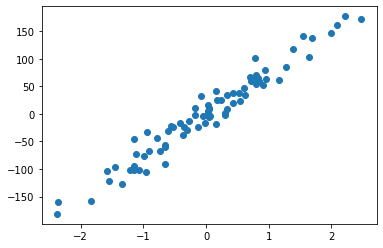

In [3]:

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

m1 = plt.scatter(x=X_train, y=y_train)


In [4]:
myModel = Linear_Regression()
myModel.fit(X_train, y_train)
predi = myModel.predict(X_test)
print(predi)

[-137254.19699776   94676.40655705 1129613.4582498  1472952.41331701
  507870.66507629 1393020.57268664  842367.86774043 -711828.34752146
  572456.46511563 1657737.05116306  557981.99898934  315048.14905838
  458752.9333304   347549.14760959  354431.91535204 1051825.73570004
 1478878.94168095  457810.08306177  347450.44747605  428428.85742185]


In [5]:
from sklearn.metrics import r2_score, mean_squared_error

def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

def mean_squared_error(y_true, y_pred): 
    return np.mean((y_true - y_pred) ** 2)

mse = mean_squared_error(y_test, predi)
accu = r2_score(y_test, predi)

print("MSE:", mse)
print("Accuracy:", accu)

MSE: 731997331338.0127
Accuracy: 0.9253717934621973


In [6]:
# way to create a list
x=np.arange(2*3*4*5)
# x

In [7]:
# This is one the errors that i faced while i was runing the LinearRegression !
np.ndarray([1] * 33)

ValueError: maximum supported dimension for an ndarray is 32, found 33

In [ ]:
arr = [2, 4, 8, 4]

# Mean

In [ ]:
def get_mean(arr):
    return np.sum(arr) / len(arr)


# Variance or error

In [ ]:
def get_variance(arr, mean):
    return ((arr - mean) ** 2)

# Covariance
###### Covariance indicates the relationship of two variables whenever one variable changes. If an increase in one variable results in an increase in the other variable, both variables are said to have a positive covariance

In [ ]:
def get_covariance(arr_x, mean_x, arr_y, mean_y):
    final_arr = (arr_x - mean_x) * (arr_y - mean_y)
    return np.sum(final_arr)


##### Now, the next step will be to calculate the coefficients and the Linear Regression Function so let’s see the code for those functions.

#### Coefficient -> tells you how much the dependent variable is expected to increase when that independent variable increases by one,

In [ ]:
def get_coefficients(x, y):
    x_mean = get_mean(x)
    y_mean = get_mean(y)
    m = get_covariance(x, x_mean, y, y_mean) / get_variance(x, x_mean)
    m = np.squeeze(np.asarray(m))
    b = y_mean - (m*x_mean)
    return m, b

#### Can standardized regression weights be greater than 1? What doaes it means?